In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import babypandas as bpd

In [4]:
# some data for today's class
data = bpd.read_csv('data/census.csv').get(['SEX', 'AGE', 'POPESTIMATE2015'])
cleaned_data = data[data.get('AGE') != 999]
males = cleaned_data[cleaned_data.get('SEX') == 1].drop(columns='SEX').set_index('AGE')
females = cleaned_data[cleaned_data.get('SEX') == 2].drop(columns='SEX').set_index('AGE')

population = bpd.DataFrame().assign(
    Males=males.get('POPESTIMATE2015'),
    Females=females.get('POPESTIMATE2015')
)

# Lecture 6
## Overlaying Plots, Functions, and Apply

# Overlaying plots

## Census Data

Downloaded from `census.gov`

In [5]:
population

,Males,Females
AGE,,
0,2035134,1942904
1,2029295,1939269
2,2026604,1939979
3,2030644,1943417
4,2055924,1964111
...,...,...
96,32585,90302
97,23092,69285
98,14719,47272


## Recall: line plots


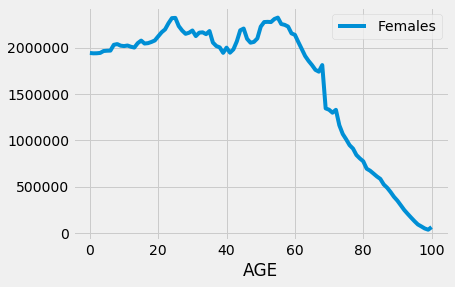

In [6]:
population.plot(kind='line', y='Females')

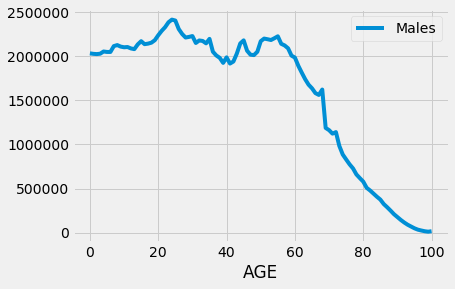

In [7]:
population.plot(kind='line', y='Males')

## Overlaying Plots

- If `y=column_name` is omitted, all columns are plotted!

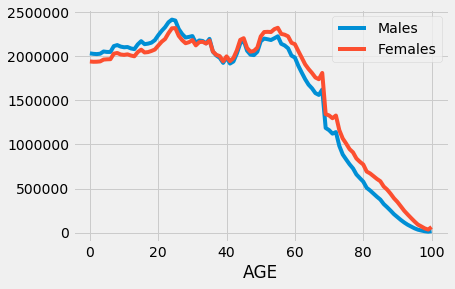

In [8]:
population.plot(kind='line')

## Interesting

- There are *many* more women than men in old age.

Text(0, 0.5, 'Ratio of Women to Men')

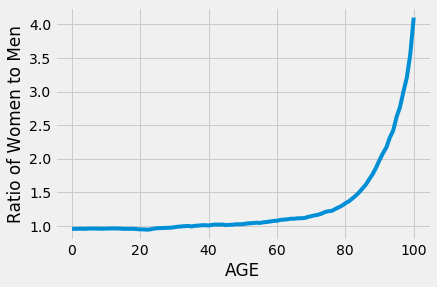

In [9]:
(population.get('Females') / population.get('Males')).plot()
plt.ylabel('Ratio of Women to Men')

### To plot multiple graphs at once:
* Drop all extraneous columns from your table.
* Specify the column for the x-axis (if not the index) in `.plot(x=column_name)`
* `plot` will plot **all** other columns on a shared y-axis.

Same thing works for `barh`, `bar`, `hist`, but not `scatter`.

# Overlaid Histograms

## Mother/Father/Child height data

- One row for each child
- Only need `father`, `mother`, and `childHeight` columns for now

In [11]:
heights = bpd.read_csv('data/galton.csv')
heights

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


## `.get([column_1, ..., column_k])`

- Passing a list of column labels to `.get()` returns a DataFrame

In [12]:
heights = heights.get(['father', 'mother', 'childHeight'])
heights

,father,mother,childHeight
0,78.5,67.0,73.2
1,78.5,67.0,69.2
2,78.5,67.0,69.0
3,78.5,67.0,69.0
4,75.5,66.5,73.5
...,...,...,...
929,62.0,66.0,64.0
930,62.0,66.0,62.0
931,62.0,66.0,61.0
932,62.5,63.0,66.5


## Plot overlayed histograms

- Try `alpha=.65` to get see-through bars.

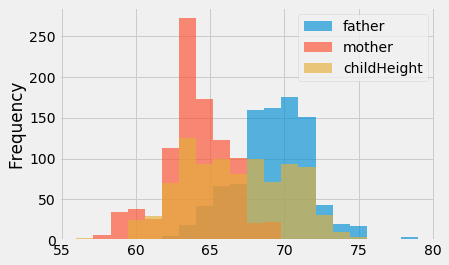

In [13]:
heights.plot(kind='hist', alpha=0.65, bins=20)

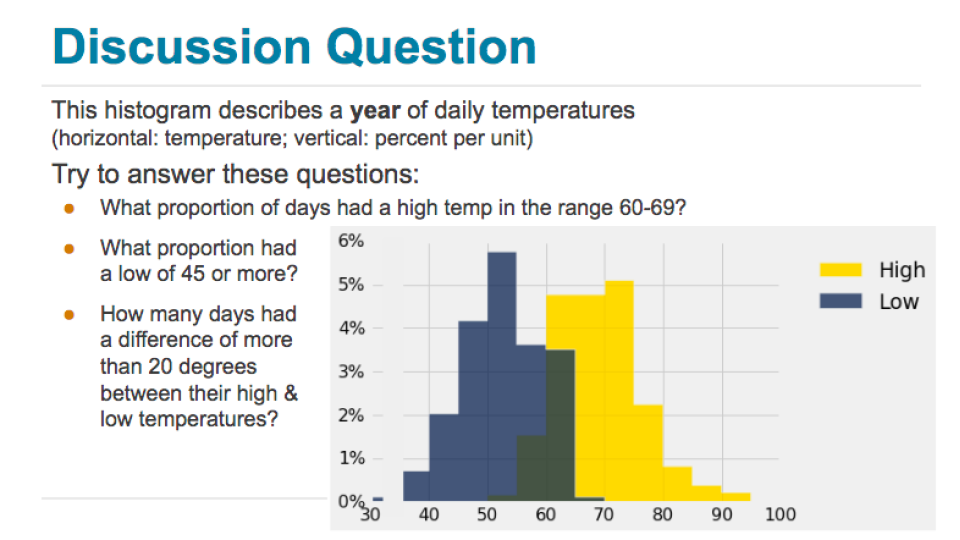

# Functions

## Defining functions
* We've learned a lot of table operations.
* So far, we've been restricted to using existing functions.
    - What if we need to clean a column with specialized logic? 
    - What if we want to understand the distribution of a custom measurement, derived from existing columns?

In [14]:
def spread(values):
    return max(values) - min(values)

In [15]:
spread([20, 42, 99, 121])

101

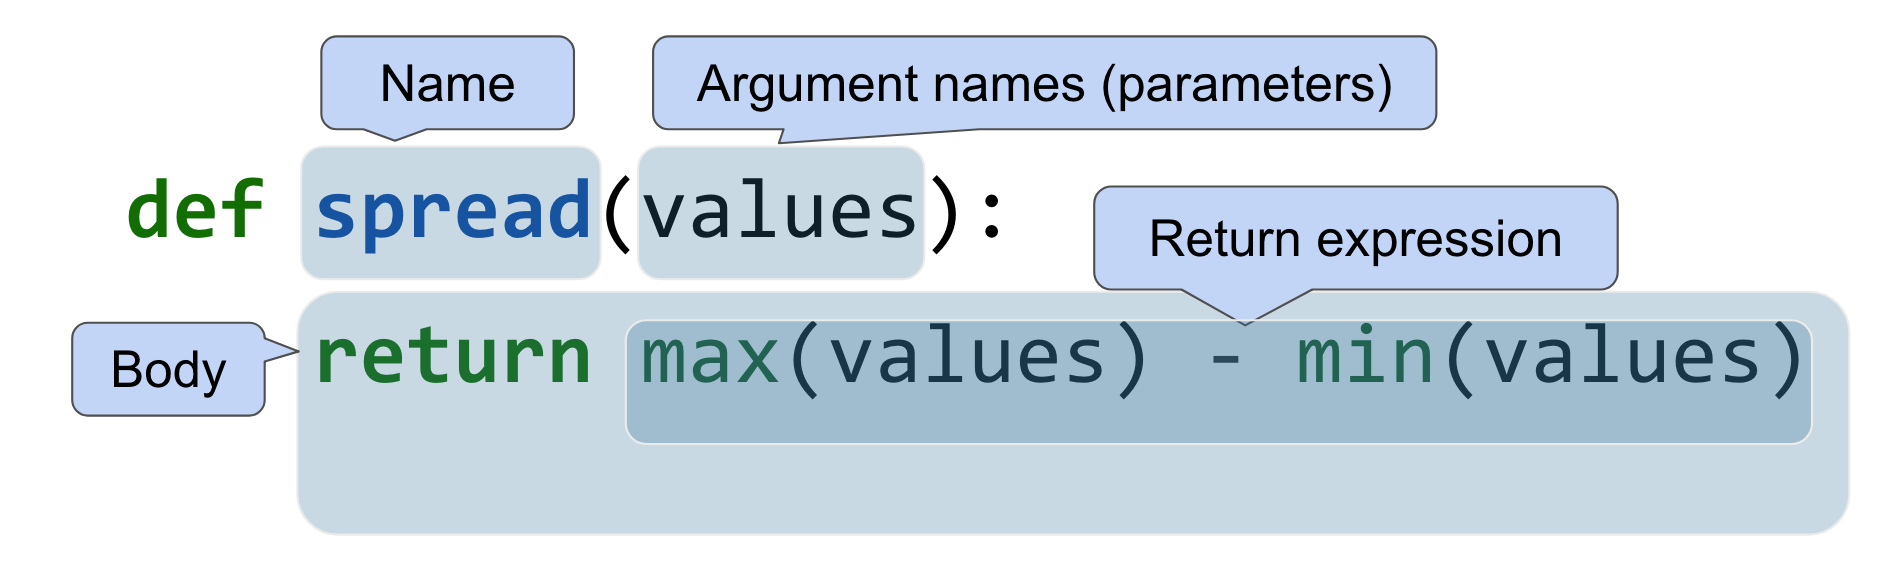

### `def` statements define functions
* User-defined functions give names to blocks of code.
* Functions are recipes; they are not run until you use (call) them.
* Variables defined in functions only exist inside the function.
* Inputs can be of any type.

In [16]:
def what_is_awesome(s):
    '''returns what's awesome'''
    return s + ' is awesome!'

In [17]:
# call the function:
what_is_awesome('data science')

'data science is awesome!'

In [18]:
s

NameError: name 's' is not defined

## Functions are lazy

- Errors aren't raised until the function is executed.

In [19]:
def where_is_the_error(s):
    '''illustrates errors don't occur until functions are executed (called)'''
    return 4.0 + s + ' is awesome!'

In [20]:
where_is_the_error(3.7)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

## Multiple Arguments

- Your functions can have as many arguments as you want:

In [21]:
def greeting(your_name, my_name):
    print('Hello', your_name, 'my name is', my_name)

In [22]:
greeting('Zelda', 'Link')

Hello Zelda my name is Link


### Example: first name

- Create a function that return's someone's first name.
- Hint: `.split()`

In [23]:
#- name your function `first_name`
def first_name(s):
    return s.split()[0]

In [24]:
first_name('Barack Obama')

'Barack'

# Applying Functions to Tables

## Example: Common First Names

- What is the most common first name among NBA players?
- We need to extract their first names.

In [26]:
nba = bpd.read_csv('data/nba_salaries.csv')
nba

,PLAYER,POSITION,TEAM,'15-'16 SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


## Using our `first_name` function

- We can use our `first_name` function here.
- Need to call it for every player.

In [27]:
nba.get('PLAYER').iloc[0]

'Paul Millsap'

In [28]:
first_name(nba.get('PLAYER').iloc[0])

'Paul'

## `.apply()`

- To apply a function to every element of a column:
```
table.get(column_name).apply(function)
```
- Returns new Series
- Pass the function, don't call it!
    - good: `.apply(first_name)`
    - bad: `.apply(first_name())`

In [29]:
nba.get('PLAYER').apply(first_name)

0         Paul
1           Al
2        Tiago
3         Jeff
4         Kyle
        ...   
412       Gary
413     DeJuan
414      Kelly
415    Garrett
416     Jarell
Name: PLAYER, Length: 417, dtype: object

## Common names

In [30]:
with_first_names = nba.assign(
    FIRSTNAME=nba.get('PLAYER').apply(first_name)
)
with_first_names

,PLAYER,POSITION,TEAM,'15-'16 SALARY,FIRSTNAME
0,Paul Millsap,PF,Atlanta Hawks,18.671659,Paul
1,Al Horford,C,Atlanta Hawks,12.000000,Al
2,Tiago Splitter,C,Atlanta Hawks,9.756250,Tiago
3,Jeff Teague,PG,Atlanta Hawks,8.000000,Jeff
4,Kyle Korver,SG,Atlanta Hawks,5.746479,Kyle
...,...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000,Gary
413,DeJuan Blair,C,Washington Wizards,2.000000,DeJuan
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240,Kelly
415,Garrett Temple,SG,Washington Wizards,1.100602,Garrett


## Groupby

In [31]:
#- count the first names
with_first_names.groupby('FIRSTNAME').count().sort_values('PLAYER', ascending=False)

,PLAYER,POSITION,TEAM,'15-'16 SALARY
FIRSTNAME,,,,
Chris,7,7,7,7
James,5,5,5,5
Kyle,5,5,5,5
Jordan,5,5,5,5
Kevin,4,4,4,4
...,...,...,...,...
Jarnell,1,1,1,1
Jarrett,1,1,1,1
Jarrid,1,1,1,1


## Example: data cleaning
* Replace all three-digit ages with 100

In [32]:
mini_census = bpd.DataFrame().assign(
    Name=['Ashley', 'Ben', 'Charlie', 'David', 'Yvonne', 'Winona', 'Xanthippe', 'Zelda'], 
    Age=[27, 68, 106, 51, 102, 27, 115, 2]
).set_index('Name')
mini_census

,Age
Name,
Ashley,27
Ben,68
Charlie,106
David,51
Yvonne,102
Winona,27
Xanthippe,115
Zelda,2


### Use `apply` to clean data
* Create a function that returns the smallest of `Age` and 100.
* Apply it to all people in census
* Create a new column with cleaned data

In [33]:
def cut_off_at_100(age):
    '''The smaller of x and 100'''
    return min(age, 100)

In [34]:
mini_census.get('Age').apply(cut_off_at_100)

Name
Ashley        27
Ben           68
Charlie      100
David         51
Yvonne       100
Winona        27
Xanthippe    100
Zelda          2
Name: Age, dtype: int64

In [35]:
mini_census.assign(
    CleanedAge=mini_census.get('Age').apply(cut_off_at_100)
)

,Age,CleanedAge
Name,,
Ashley,27,27
Ben,68,68
Charlie,106,100
David,51,51
Yvonne,102,100
Winona,27,27
Xanthippe,115,100
Zelda,2,2


In [36]:
top_movies

NameError: name 'top_movies' is not defined

### Discussion Question

If the name of the table is `top_movies` and the name of a column is "Title", how do we find the length of each movie title?

Option|Answer
---|---
A|`top_movies.get('Title').apply(len(s))`
B|`top_movies.get('Title').apply(len)`
C|`top_movies.apply(len, 'Title')`
D|`top_movies.apply('Title', len)`

In [39]:
# BEGIN SOLUTION
top_movies = bpd.read_csv('data/top_movies.csv')
top_movies.get('Title').apply(len)
# END SOLUTION

0      28
1       6
2       7
3      14
4      21
       ..
195    16
196    23
197    15
198    13
199    35
Name: Title, Length: 200, dtype: int64

## Aside: resetting the index

- What if we had set the movie title as the index?

In [40]:
by_title = top_movies.set_index('Title')
by_title

,Studio,Gross,Gross (Adjusted),Year
Title,,,,
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...
The Caine Mutiny,Columbia,21750000,386173500,1954
The Bells of St. Mary's,RKO,21333333,545882400,1945
Duel in the Sun,Selz.,20408163,443877500,1946


In [41]:
by_title.index.apply(len)

AttributeError: 'Index' object has no attribute 'apply'

## Aside: resetting the index

- Only Series (columns) have the `.apply` method.
- But we can make the index a column with `.reset_index`:

In [42]:
by_title

,Studio,Gross,Gross (Adjusted),Year
Title,,,,
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...
The Caine Mutiny,Columbia,21750000,386173500,1954
The Bells of St. Mary's,RKO,21333333,545882400,1945
Duel in the Sun,Selz.,20408163,443877500,1946


In [43]:
by_title.reset_index().get('Title').apply(len)

0      28
1       6
2       7
3      14
4      21
       ..
195    16
196    23
197    15
198    13
199    35
Name: Title, Length: 200, dtype: int64

# Example: Prediction

### Sir Francis Galton

* 1822 - 1911 (knighted in 1909)
* A pioneer in making predictions
* Particular interest in heredity
* Charles Darwin's half-cousin




### Can we predict the height of a child, given the height of their parents?
* read in heights from `galton.csv`
* relabel columns for convenience

In [45]:
galton = bpd.read_csv('data/galton.csv')
galton = (
    galton.assign(
        midparent=galton.get('midparentHeight'),
        child=galton.get('childHeight')
    )
    .drop(columns=['midparentHeight', 'childHeight'])
)
galton

,family,father,mother,children,childNum,gender,midparent,child
0,1,78.5,67.0,4,1,male,75.43,73.2
1,1,78.5,67.0,4,2,female,75.43,69.2
2,1,78.5,67.0,4,3,female,75.43,69.0
3,1,78.5,67.0,4,4,female,75.43,69.0
4,2,75.5,66.5,4,1,male,73.66,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,3,1,male,66.64,64.0
930,203,62.0,66.0,3,2,female,66.64,62.0
931,203,62.0,66.0,3,3,female,66.64,61.0
932,204,62.5,63.0,2,1,male,65.27,66.5


## Scatterplot of child vs. mother/father
* Children's height influenced by a combination of the height of the mother and father
- Don't worry about plotting code.

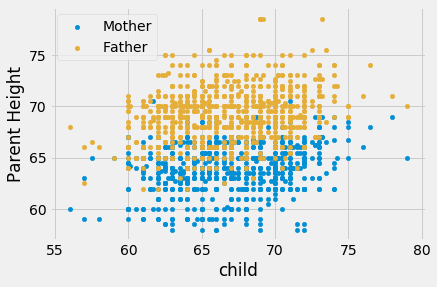

In [46]:
ax = galton.plot(kind='scatter', x='child', y='mother')
ax = galton.plot(kind='scatter', x='child', y='father', ax=ax, color='C2')
plt.ylabel('Parent Height')
plt.legend(['Mother', 'Father'])

### scatterplot of midparent vs child height
* Galton calculated the variable `midparent` that is a weighted average of the parents' height

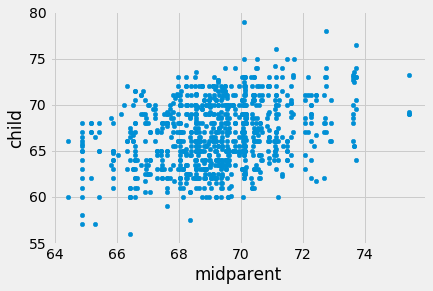

In [47]:
galton.plot(kind='scatter', x='midparent', y='child')

### Can we predict the height of a child, given the midparent height?
* Idea: predict average height of child using data close to the input.

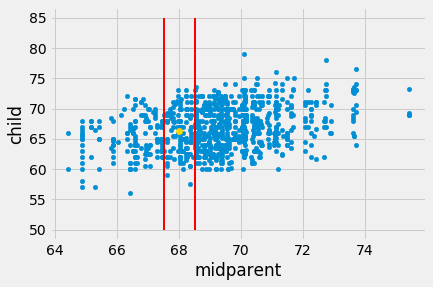

In [48]:
galton.plot(kind='scatter', x='midparent', y='child')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

### Can we predict the height of a child, given the midparent height?

* Given the midparent height, restrict to nearby examples in the dataset (within 0.5 in).
* Take the average child height within these nearby examples.
* This average is our guess!

In [49]:
def predict_child(mp):
    '''returns a childs predicted height, given the midparent height, mp.'''
    is_close = (galton.get('midparent') > (mp - 0.5)) & (galton.get('midparent') < (mp + 0.5))
    nearby = galton[is_close]
    return nearby.get('child').mean()

predict_child(68)

66.24045801526718

### Can we predict the height of a child, given the midparent height?
* Apply our function to all our examples
* Create a new column called `prediction` and plot the output 

In [50]:
predictions = galton.get('midparent').apply(predict_child)
predictions

0      70.100000
1      70.100000
2      70.100000
3      70.100000
4      70.415789
         ...    
929    65.156579
930    65.156579
931    65.156579
932    64.229630
933    64.229630
Name: midparent, Length: 934, dtype: float64

In [51]:
with_predictions = galton.assign(prediction=predictions)
with_predictions

,family,father,mother,children,childNum,gender,midparent,child,prediction
0,1,78.5,67.0,4,1,male,75.43,73.2,70.100000
1,1,78.5,67.0,4,2,female,75.43,69.2,70.100000
2,1,78.5,67.0,4,3,female,75.43,69.0,70.100000
3,1,78.5,67.0,4,4,female,75.43,69.0,70.100000
4,2,75.5,66.5,4,1,male,73.66,73.5,70.415789
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,3,1,male,66.64,64.0,65.156579
930,203,62.0,66.0,3,2,female,66.64,62.0,65.156579
931,203,62.0,66.0,3,3,female,66.64,61.0,65.156579
932,204,62.5,63.0,2,1,male,65.27,66.5,64.229630


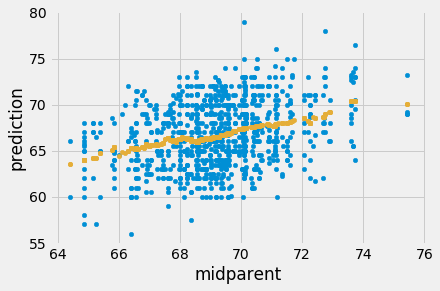

In [52]:
ax = with_predictions.plot(kind='scatter', x='midparent', y='child')
with_predictions.plot(kind='scatter', x='midparent', y='prediction', ax=ax, color='C2')